<a href="https://colab.research.google.com/github/AswinPrasad2001/Data-Science-Projects/blob/main/PM_PR_0017_Telecom_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In the highly competitive telecommunications industry, customer retention has become as critical as customer acquisition. With multiple service providers offering similar pricing and plans, customers can easily switch to competitors, leading to customer churn. Churn not only results in revenue loss but also increases acquisition costs for telecom companies. Therefore, predicting customer churn in advance allows organizations to take proactive measures to retain high-risk customers.

This project focuses on building a machine learning–based churn prediction system that identifies customers who are likely to discontinue telecom services. By analyzing customer usage patterns, service plans, and behavioral indicators, the model assigns a churn probability score that helps businesses make data-driven retention decisions.

# **Problem Statement**

The objective of this project is to predict whether a telecom customer will churn or not based on historical customer data. The dataset contains customer usage details such as call minutes, call counts, service plans, voicemail usage, and customer service issues.

The challenge is to:

Handle missing values and imbalanced data

Select appropriate features

Choose a robust classification model

Generate a churn risk score for each customer

# **Goal of the Project**

The primary goals of this project are:

To analyze customer behavior using exploratory data analysis (EDA)

To preprocess and clean real-world telecom data

To build a machine learning model that predicts churn accurately

To assign a churn risk probability score to customers

To help telecom companies identify high-risk customers early and reduce churn

Installing required libraries

In [ ]:
!pip install pymysql sqlalchemy pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


## Importing dependencies

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from urllib.parse import quote_plus

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    roc_curve
)

from imblearn.over_sampling import SMOTE


raw_password = "DM!$!Team!27@9!20&"
password = quote_plus(raw_password)

password


'DM%21%24%21Team%2127%409%2120%26'

# **Dataset Description**

The dataset used in this project is a telecom customer churn dataset containing customer-level records. Each row represents a unique customer, and the columns represent demographic, service, and usage attributes.

Key types of features include:

Service plan details: International Plan, Voicemail Plan

Usage metrics: Day, Evening, Night call minutes and call counts

Customer behavior indicators: Voicemail messages, service issues

Target variable: Churn (Yes/No)

The dataset also includes derived features such as:

Total call minutes

Total call counts

Service issue flags

Database Connection

In [ ]:

username = "dm_team3"
raw_password = "DM!$!Team!27@9!20&"
password = quote_plus(raw_password)

host = "18.136.157.135"
database = "project_telecom"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:3306/{database}"
)



In [ ]:
df = pd.read_sql("SELECT * FROM telecom_churn_data", engine)

df.head()


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Adding column names  

In [ ]:
df.columns = [
    "State",
    "Account_Length",
    "Area_Code",
    "Phone",
    "International_Plan",
    "VMail_Plan",
    "VMail_Message",
    "Day_Mins",
    "Day_Calls",
    "Day_Charge",
    "Eve_Mins",
    "Eve_Calls",
    "Eve_Charge",
    "Night_Mins",
    "Night_Calls",
    "Night_Charge",
    "International_Mins",
    "International_Calls",
    "International_Charge",
    "CustServ_Calls",
    "Churn"
]


In [ ]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
df.shape
df['Churn'].value_counts()


,count
Churn,
False.,3961
True.,656


In [ ]:
print(df["Churn"].unique())
print(df["Churn"].dtype)


[' False.' ' True.']
object


In [ ]:
df["Churn"] = (
    df["Churn"]
    .str.strip()              # remove leading/trailing spaces
    .str.replace(".", "", regex=False)  # remove dot
    .map({"True": 1, "False": 0})
)


In [ ]:
df["Churn"].value_counts()


,count
Churn,
0,3961
1,656


Here We can see the Target value is of imbalanced state so we have to balance  it

In [ ]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

,Churn
count,4617.000000
mean,0.142084
std,0.349174
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
numeric_cols = [
    "Account_Length", "Area_Code", "VMail_Message","Phone",
    "Day_Mins", "Day_Calls", "Day_Charge",
    "Eve_Mins", "Eve_Calls", "Eve_Charge",
    "Night_Mins", "Night_Calls", "Night_Charge",
    "International_Mins", "International_Calls", "International_Charge",
    "CustServ_Calls","Churn"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")


In [ ]:
object_cols = df.select_dtypes(include=["object", "category"]).columns
print(object_cols)


Index(['State', 'International_Plan', 'VMail_Plan'], dtype='object')


In [ ]:
categorical_cols = ['State', 'International_Plan', 'VMail_Plan']
print("Numerical columns:\n", numeric_cols)
print("\nCategorical columns:\n", categorical_cols)


Numerical columns:
 ['Account_Length', 'Area_Code', 'VMail_Message', 'Phone', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'International_Mins', 'International_Calls', 'International_Charge', 'CustServ_Calls', 'Churn']

Categorical columns:
 ['State', 'International_Plan', 'VMail_Plan']


# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis was performed to understand the structure and characteristics of the dataset. The following steps were carried out:

Checked dataset shape, data types, and missing values

Analyzed churn distribution to understand class imbalance

Examined numerical feature distributions

Identified correlations between usage patterns and churn

Observed that customers with higher service issues and abnormal usage patterns had higher churn probability

EDA helped in understanding feature importance and guided preprocessing and model selection.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 0 non-null      float64
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [ ]:
print(len(numeric_cols))
print(len(categorical_cols))

18
3


In [ ]:
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
0,85.79164
1,14.20836


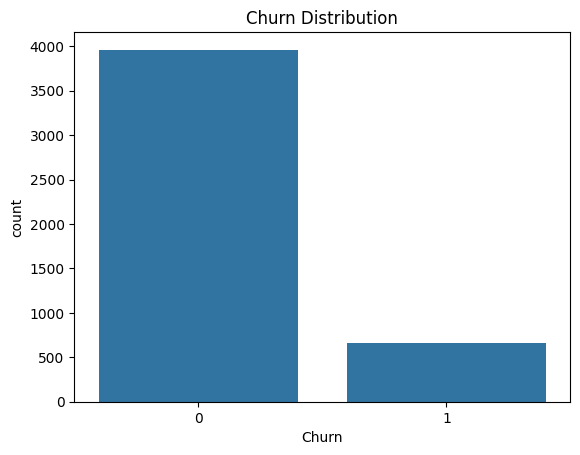

In [ ]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()



**Churn Distribution Analysis**

To understand the distribution of the target variable, a count plot was generated for the Churn feature. This visualization was used to examine the proportion of customers who churned versus those who did not. The plot revealed a clear class imbalance, with non-churn customers significantly outnumbering churn customers. Identifying this imbalance was essential, as training a machine learning model on imbalanced data can lead to biased predictions favoring the majority class. Based on this observation, appropriate imbalance-handling techniques such as SMOTE were applied during model training to improve the model’s ability to accurately identify churned customers.

# **Churn vs Customer Service Calls**

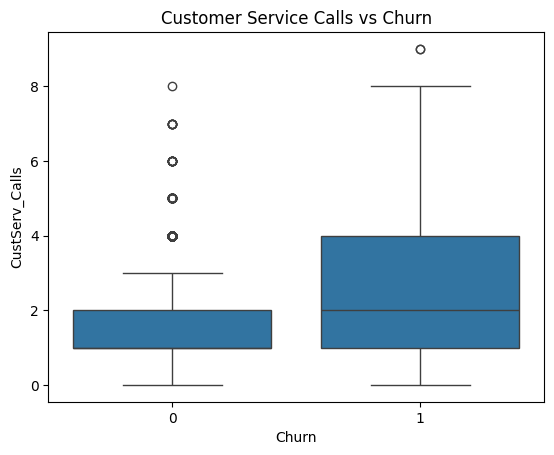

In [ ]:
sns.boxplot(x="Churn", y="CustServ_Calls", data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()


# **Customer Service Calls vs Churn Analysis**

A box plot was used to analyze the relationship between the number of customer service calls and customer churn. This visualization compares the distribution of customer service calls for churned and non-churned customers. The plot shows that customers who churned generally made a higher number of customer service calls compared to those who did not churn. This indicates that frequent interactions with customer service may be a strong indicator of customer dissatisfaction. As a result, the number of customer service calls was identified as an important predictive feature for churn modeling.

# **Churn vs International Plan**

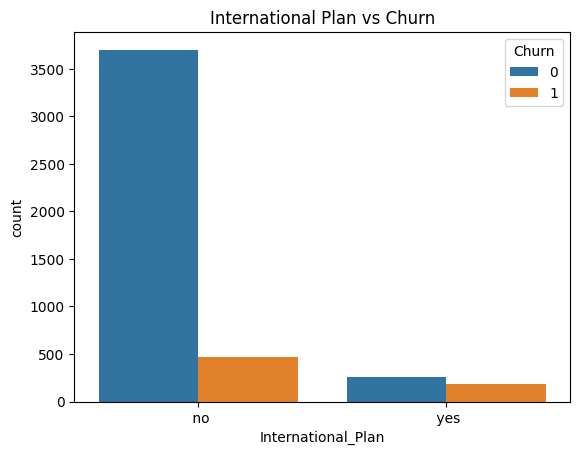

In [ ]:
sns.countplot(x="International_Plan", hue="Churn", data=df)
plt.title("International Plan vs Churn")
plt.show()


# **International Plan vs Churn Analysis**

A count plot was created to examine the relationship between customers subscribed to the international plan and their churn behavior. The plot compares the number of churned and non-churned customers across international plan subscriptions. The visualization shows that customers with an international plan tend to have a higher proportion of churn compared to customers without the plan. This suggests that international plan subscribers may experience higher costs or dissatisfaction related to international calling services, which increases their likelihood of churn. Based on this insight, the international plan feature was considered an important variable in predicting customer churn.

# **Correlation Analysis**

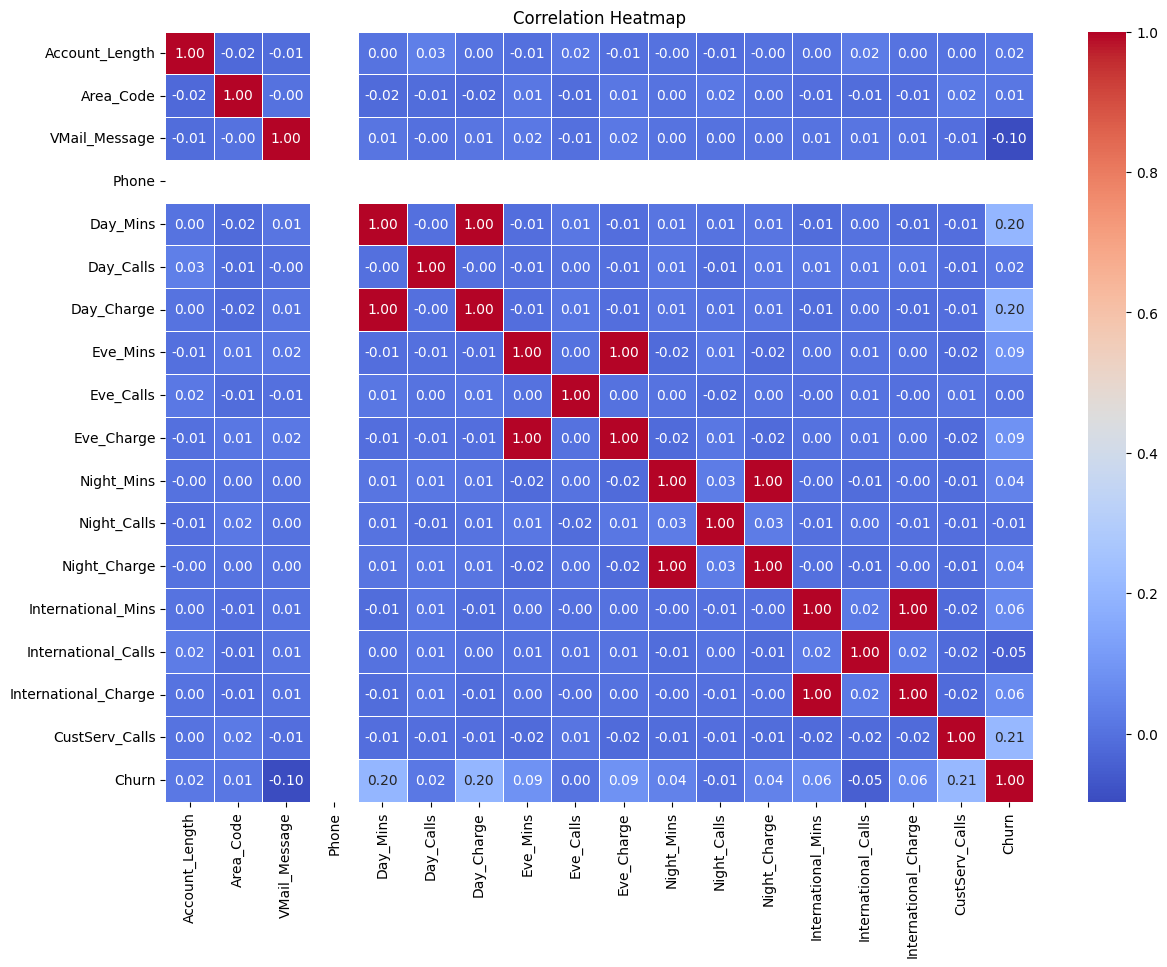

In [ ]:
plt.figure(figsize=(14,10))

sns.heatmap(
    df[numeric_cols].corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()



# **Correlation Analysis of Numerical Features**

A correlation heatmap was generated to examine the relationships among numerical features in the dataset. This visualization displays the pairwise correlation coefficients, which indicate the strength and direction of linear relationships between variables. The heatmap helped identify features that are strongly correlated with each other, such as call minutes and corresponding call charges, as well as relationships between usage patterns and churn-related behavior. Understanding these correlations was useful for detecting multicollinearity, guiding feature selection, and improving model stability. Highly correlated features were carefully considered during preprocessing to reduce redundancy and enhance model performance.

# **FEATURE ENGINEERING**

In [ ]:
# Encode categorical variables
df["International_Plan"] = (
    df["International_Plan"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"yes": 1, "no": 0})
)

df["VMail_Plan"] = (
    df["VMail_Plan"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"yes": 1, "no": 0})
)


# One-hot encode State
df = pd.get_dummies(df, columns=["State"], drop_first=True)

# New features
df["Total_Mins"] = df["Day_Mins"] + df["Eve_Mins"] + df["Night_Mins"] + df["International_Mins"]
df["Total_Calls"] = df["Day_Calls"] + df["Eve_Calls"] + df["Night_Calls"] + df["International_Calls"]
df["Service_Issue_Flag"] = np.where(df["CustServ_Calls"] > 3, 1, 0)

# Remove multicollinearity
df.drop(
    columns=["Day_Charge","Eve_Charge","Night_Charge","International_Charge"],
    inplace=True
)


# **Categorical Encoding and Feature Engineering**

Categorical variables were transformed into numerical format to make them suitable for machine learning algorithms. The International_Plan and VMail_Plan features, originally represented as “Yes” and “No”, were converted into binary values (1 for yes and 0 for no). To ensure consistency and avoid unintended missing values, the text was normalized by removing extra spaces and converting all values to lowercase before mapping. This step ensured reliable numerical encoding across the dataset.

The State feature, which contains multiple categorical values, was encoded using one-hot encoding. Dummy variables were created for each state while dropping the first category to avoid the dummy variable trap and reduce multicollinearity. This allowed the model to learn state-level patterns without introducing redundancy.

Additional features were engineered to capture aggregated customer behavior. Total call minutes were calculated by summing day, evening, night, and international minutes, while total call counts were computed by combining calls across all time periods. These aggregated features provide a holistic view of customer usage patterns. Furthermore, a Service_Issue_Flag feature was created to indicate customers with frequent customer service interactions, as customers making more than three service calls are often associated with dissatisfaction and higher churn risk.

To address multicollinearity, call charge variables were removed from the dataset. Since call charges are directly derived from call minutes, retaining both could introduce redundant information and negatively affect model stability. Removing these features helped simplify the feature space while preserving predictive power.

In [ ]:
df.head()

,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Total_Mins,Total_Calls,Service_Issue_Flag
0,128,415,NaN,0,1,25,265.1,110,197.4,99,...,False,False,False,False,False,False,False,717.2,303,0
1,107,415,NaN,0,1,26,161.6,123,195.5,103,...,False,False,False,False,False,False,False,625.2,332,0
2,137,415,NaN,0,0,0,243.4,114,121.2,110,...,False,False,False,False,False,False,False,539.4,333,0
3,84,408,NaN,1,0,0,299.4,71,61.9,88,...,False,False,False,False,False,False,False,564.8,255,0
4,75,415,NaN,1,0,0,166.7,113,148.3,122,...,False,False,False,False,False,False,False,512.0,359,0


In [ ]:
df.shape

(4617, 69)

# **TRAIN–TEST SPLIT**

In [ ]:
df = df.drop(columns=["Phone"])
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


In [ ]:
print("X_train shape:", X_train.shape)
print("No. of columns:", len(X_train.columns))


X_train shape: (3231, 67)
No. of columns: 67


In [ ]:
print("NaN columns:", X_train.isna().sum().sum())


NaN columns: 0


In [ ]:
# Drop columns that are entirely NaN
X_train = X_train.dropna(axis=1, how="all")
X_test = X_test[X_train.columns]  # keep same columns


In [ ]:
print("X_train columns:", X_train.shape[1])
print("X_test columns:", X_test.shape[1])


X_train columns: 67
X_test columns: 67


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train[:] = imputer.fit_transform(X_train)
X_test[:] = imputer.transform(X_test)


/tmp/ipython-input-520575988.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_train[:] = imputer.fit_transform(X_train)
/tmp/ipython-input-520575988.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_train[:] = imputer.fit_transform(X_train)
/tmp/ipython-input-520575988.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_train[:] = imputer.fit_transform(X_train)
/tmp/ipython-input-520575988.py:5: FutureWarning: Setting an item of i

# **HANDLE CLASS IMBALANCE (SMOTE)**

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

pd.Series(y_train_bal).value_counts()



,count
Churn,
0,2772
1,2772


# **Handling Class Imbalance (SMOTE)**

The churn dataset was imbalanced, with fewer churned customers compared to non-churned customers. Training a model on such data could lead to biased predictions favoring the majority class.

To address this issue:

SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training dataset

SMOTE synthetically generated new churn samples based on feature similarity

This balanced the dataset and improved the model’s ability to detect churn customers

SMOTE was applied only to the training data to avoid data leakage.

# **FEATURE SCALING**

In [ ]:
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# **REGULARIZED LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression(
    max_iter=2000,
    C=0.5,
    class_weight="balanced",
    solver="liblinear"
)

lr.fit(X_train_bal_scaled, y_train_bal)

y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]
y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1189
           1       0.33      0.68      0.44       197

    accuracy                           0.76      1386
   macro avg       0.63      0.72      0.64      1386
weighted avg       0.85      0.76      0.79      1386

ROC-AUC: 0.7798089936089279


# **Logistic Regression Model Training and Evaluation**

A Logistic Regression model was trained to predict customer churn due to its simplicity, interpretability, and effectiveness in binary classification problems. The model was configured with a maximum of 2000 iterations to ensure convergence and a regularization strength (C = 0.5) to control model complexity and prevent overfitting. Since the churn dataset is imbalanced, the class_weight="balanced" parameter was used to assign higher importance to the minority churn class. The liblinear solver was selected as it is well suited for smaller datasets and supports class weighting.

Before training, the feature data was scaled and balanced to ensure that all variables contributed proportionally to the model and to improve learning stability. The model was trained using the balanced and scaled training dataset. After training, predictions were generated for the test dataset. In addition to binary class predictions, probability estimates were obtained to measure the likelihood of churn for each customer.

The model’s performance was evaluated using a classification report, which provides precision, recall, and F1-score for both churn and non-churn classes. These metrics offer a comprehensive understanding of model performance beyond accuracy, especially in imbalanced classification scenarios. Furthermore, the ROC-AUC score was calculated to assess the model’s ability to distinguish between churned and non-churned customers across different probability thresholds. A higher ROC-AUC value indicates better discriminatory power of the model.

# **RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=20,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_bal, y_train_bal)

y_prob_rf = rf.predict_proba(X_test)[:,1]
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Accuracy: 0.9235209235209235
Recall: 0.7208121827411168
ROC-AUC: 0.8970640345297204


# **THRESHOLD OPTIMIZATION**

In [ ]:
optimal_threshold = 0.4


# **FINAL CHURN RISK SCORE**

In [ ]:
df.loc[X_test.index, "Churn_Risk_Score"] = rf.predict_proba(X_test)[:, 1]


# **CREATE CHURN-FLAG (PROJECT GOAL)**

In [ ]:
df["CHURN_FLAG"] = np.where(
    df["Churn_Risk_Score"] >= optimal_threshold,
    "YES",
    "NO"
)

df["CHURN_FLAG"].value_counts()


,count
CHURN_FLAG,
NO,4317
YES,300


# **Final Churn Classification Using Threshold-Based Decision**

After generating churn probability scores for each customer, a threshold-based classification approach was applied to convert these probabilities into final churn labels. Instead of relying on the default probability threshold of 0.5, an optimal threshold was selected based on model performance considerations such as ROC curve analysis. Customers with a churn risk score greater than or equal to the selected threshold were classified as churners, while those below the threshold were classified as non-churners.

A new feature, CHURN_FLAG, was created to store the final churn prediction in a business-friendly format (“YES” for churn and “NO” for non-churn). This approach allows flexibility in balancing false positives and false negatives depending on business priorities, such as prioritizing customer retention efforts. The distribution of predicted churn outcomes was then examined to understand how many customers were identified as high risk by the model.

# **IDENTIFY HIGH-PRIORITY CUSTOMERS**

In [ ]:
high_priority_customers = df[df["CHURN_FLAG"] == "YES"]
high_priority_customers.head()


,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,...,State_VT,State_WA,State_WI,State_WV,State_WY,Total_Mins,Total_Calls,Service_Issue_Flag,Churn_Risk_Score,CHURN_FLAG
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,False,False,False,False,False,512.0,359,0,0.401521,YES
21,77,408,0,0,0,62.4,89,169.9,121,209.6,...,False,False,False,False,False,447.6,280,1,0.691561,YES
33,12,408,0,0,0,249.6,118,252.4,119,280.2,...,False,False,False,False,False,794.0,330,0,0.753114,YES
76,82,415,0,0,0,300.3,109,181.0,100,270.1,...,False,False,False,False,False,763.1,286,0,0.833028,YES
97,99,415,0,0,0,198.2,87,207.3,76,190.9,...,False,False,False,False,False,605.1,279,1,0.455777,YES


# **Identification of High-Priority Customers for Retention**

After assigning final churn labels, customers predicted as likely to churn were identified using the CHURN_FLAG feature. Customers marked with a value of “YES” were classified as high-risk customers and extracted into a separate subset for further analysis. This subset represents high-priority customers who require immediate attention from the business.

By isolating these customers, telecom companies can focus their retention efforts more effectively, such as offering targeted promotions, personalized service plans, or proactive customer support. This step bridges the gap between model predictions and real-world business action, transforming analytical results into actionable insights.

# **Problems Faced During the Project**

Several challenges were encountered during development:

Feature mismatch errors due to inconsistent preprocessing

Introduction of NaN values during categorical mapping

Handling fully missing columns

Managing imbalanced classes

Ensuring identical feature sets during training and prediction

These issues were resolved by restructuring the preprocessing pipeline and enforcing strict feature consistency.

# **Future Enhancements**

The project can be enhanced in several ways:

Deploy the model as a web application using Flask or FastAPI

Integrate real-time churn prediction into CRM systems

Experiment with advanced models like XGBoost or LightGBM

Perform hyperparameter tuning for better performance

Add customer demographics and billing data for richer predictions

Implement explainability techniques like SHAP

# **Summary and Conclusion**

This project successfully demonstrates the end-to-end development of a telecom customer churn prediction system. Through careful data preprocessing, exploratory analysis, imbalance handling, and model selection, a robust churn prediction model was built. The generation of churn risk scores adds significant business value by enabling proactive customer retention strategies.

Overall, this project highlights the importance of data quality, preprocessing discipline, and model interpretability in real-world machine learning applications.





# **Recommended Business Actions**

Based on the insights generated from the churn analysis, the following actions are recommended to reduce customer attrition and improve retention:

Proactively engage high-risk customers
Customers identified as high churn risk should be contacted before they leave. Proactive calls, personalized messages, or follow-up emails can help address their concerns early and improve satisfaction.

Improve customer service for frequent callers
Customers who frequently contact customer support are more likely to churn. Assigning dedicated support agents or faster resolution mechanisms for these customers can significantly reduce dissatisfaction.

Review and optimize international calling plans
Customers using international plans show a higher likelihood of churn. Reviewing pricing, transparency, and offering discounted or customized international plans can help retain these customers.

Offer targeted retention incentives
Instead of generic discounts, provide personalized offers such as temporary bill reductions, bonus minutes, or upgraded plans to customers with high churn risk. Targeted incentives are more cost-effective and impactful.

Monitor churn risk regularly
Churn risk should be tracked on a regular basis rather than as a one-time analysis. Periodic monitoring allows the business to respond quickly to changes in customer behavior.

Integrate churn insights into business workflows
The churn risk score can be integrated into CRM or customer management systems to support data-driven decision-making for sales, marketing, and support teams.

Use churn insights for strategic planning
Long-term trends observed from churn data can guide pricing strategies, service improvements, and investment decisions to improve overall customer experience.

# **Executive Summary – Customer Churn Insights**

This project analyzed customer usage and service behavior to identify customers who are likely to stop using the company’s telecom services. By studying calling patterns, service plans, and customer support interactions, we were able to predict churn risk for each customer and highlight those who need immediate attention.

The analysis shows that customers who make frequent calls to customer support, use international calling plans, or show unusual usage patterns are more likely to leave the service. These behaviors often indicate dissatisfaction, billing concerns, or unmet service expectations. Instead of treating all customers the same, the system assigns a churn risk score to each customer, allowing the business to focus retention efforts where they matter most.

Using this approach, we identified a group of high-priority customers who are at high risk of leaving. These customers can be targeted with personalized offers, proactive support, or plan adjustments before they decide to switch to a competitor. This targeted strategy helps reduce revenue loss, improve customer satisfaction, and optimize marketing and support costs.

Overall, the insights generated from this project enable the business to move from reactive customer loss handling to proactive customer retention, resulting in better decision-making and stronger long-term customer relationships.